# 01_EDA.ipynb

## 1. Import des bibliothèques


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Chargement des données brutes


In [10]:
# Remplace le chemin si nécessaire
FILE_PATH = 'C:/Users/Hp/Desktop/energie/data/household_power_consumption.txt'

df = pd.read_csv(
    FILE_PATH,
    sep=';',
    parse_dates={'datetime': ['Date', 'Time']},
    dayfirst=True,
    infer_datetime_format=True,
    na_values='?',
    low_memory=False
)

# Aperçu des données
display(df.head())
display(df.info())


C:\Users\Hp\AppData\Local\Temp\ipykernel_14232\918632351.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


None

## 3. Statistiques descriptives & valeurs manquantes


In [3]:
# Statistiques de base
stats = df.describe().T
display(stats)

# Pourcentage de valeurs manquantes par colonne
nan_pct = (df.isna().mean() * 100).round(2)
print("Pourcentage de valeurs manquantes (%) :")
print(nan_pct)


,count,mean,min,25%,50%,75%,max,std
datetime,2075259,2008-12-06 07:12:59.999994112,2006-12-16 17:24:00,2007-12-12 00:18:30,2008-12-06 07:13:00,2009-12-01 14:07:30,2010-11-26 21:02:00,NaN
Global_active_power,2049280.0,1.091615,0.076,0.308,0.602,1.528,11.122,1.057294
Global_reactive_power,2049280.0,0.123714,0.0,0.048,0.1,0.194,1.39,0.112722
Voltage,2049280.0,240.839858,223.2,238.99,241.01,242.89,254.15,3.239987
Global_intensity,2049280.0,4.627759,0.2,1.4,2.6,6.4,48.4,4.444396
Sub_metering_1,2049280.0,1.121923,0.0,0.0,0.0,0.0,88.0,6.153031
Sub_metering_2,2049280.0,1.29852,0.0,0.0,0.0,1.0,80.0,5.822026
Sub_metering_3,2049280.0,6.458447,0.0,0.0,1.0,17.0,31.0,8.437154


Pourcentage de valeurs manquantes (%) :
datetime                 0.00
Global_active_power      1.25
Global_reactive_power    1.25
Voltage                  1.25
Global_intensity         1.25
Sub_metering_1           1.25
Sub_metering_2           1.25
Sub_metering_3           1.25
dtype: float64


## 4. Visualisations

### 4.1. Consommation active moyenne journalière


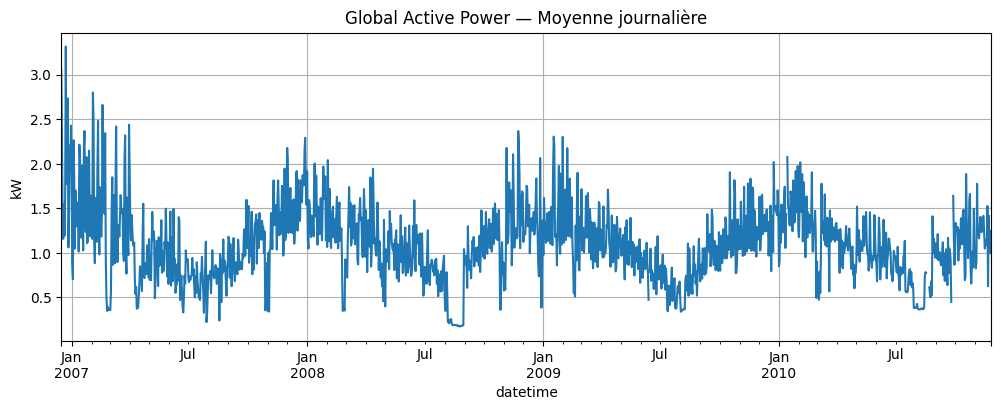

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
df.set_index('datetime')['Global_active_power'] \
  .resample('D').mean() \
  .plot(ax=ax)
ax.set_title("Global Active Power — Moyenne journalière")
ax.set_ylabel("kW")
ax.grid(True)
plt.show()


### 4.2. Histogramme de la consommation active


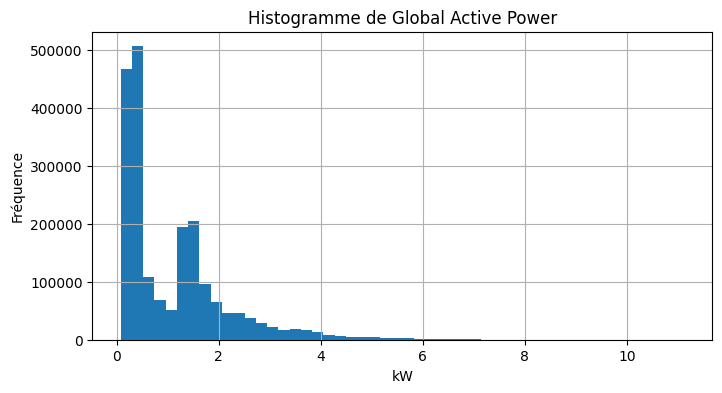

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
df['Global_active_power'].hist(bins=50, ax=ax)
ax.set_title("Histogramme de Global Active Power")
ax.set_xlabel("kW")
ax.set_ylabel("Fréquence")
plt.show()


## 5. Préparation & resampling horaire

- Interpolation linéaire des valeurs manquantes
- Passage à une fréquence horaire


In [8]:
# ...existing code...

# 5.1 Interpolation linéaire dans le temps
df_interp = (
    df.set_index('datetime')
      .interpolate(method='time')
      .reset_index()
)

# 5.2 Passage en fréquence horaire
df_hourly = (
    df_interp
    .set_index('datetime')
    .resample('H')
    .mean()
    .interpolate(method='time')
    .reset_index()
)

display(df_hourly.head())
display(df_hourly.info())

# ...existing code...

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
1,2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2,2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
3,2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
4,2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34589 entries, 0 to 34588
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               34589 non-null  datetime64[ns]
 1   Global_active_power    34589 non-null  float64       
 2   Global_reactive_power  34589 non-null  float64       
 3   Voltage                34589 non-null  float64       
 4   Global_intensity       34589 non-null  float64       
 5   Sub_metering_1         34589 non-null  float64       
 6   Sub_metering_2         34589 non-null  float64       
 7   Sub_metering_3         34589 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.1 MB


None


## 6. Feature Engineering temporel

- Extraction de l’heure, du jour de semaine, du mois et du flag weekend


In [9]:
df_hourly['hour']       = df_hourly['datetime'].dt.hour
df_hourly['weekday']    = df_hourly['datetime'].dt.weekday
df_hourly['month']      = df_hourly['datetime'].dt.month
df_hourly['is_weekend'] = df_hourly['weekday'].isin([5,6]).astype(int)

display(df_hourly[['datetime','hour','weekday','month','is_weekend']].head())


,datetime,hour,weekday,month,is_weekend
0,2006-12-16 17:00:00,17,5,12,1
1,2006-12-16 18:00:00,18,5,12,1
2,2006-12-16 19:00:00,19,5,12,1
3,2006-12-16 20:00:00,20,5,12,1
4,2006-12-16 21:00:00,21,5,12,1


---

À partir de là, on a un jeu de données propre, horaire et enrichi pour passer à la modélisation !  
La prochaine étape sera de définir notre pipeline d’entraînement dans **`src/train_forecast.py`**.
